# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
# Load data using numpy
data = np.loadtxt(r'C:\Users\SVF\Desktop\Data\5_a.csv', delimiter = ',' , skiprows=1 )

print('No. of Positive Datapoints:', np.sum(data[0:] == float(1)))

print('No. of Negative Datapoints:', np.sum(data[0:] == float(0)))

No. of Positive Datapoints: 10000
No. of Negative Datapoints: 100


In [3]:
# Create y_pred
y = data[:, 0] 
y_pred = np.where(data[0:, 1] > 0.5, 1, 0)
    

In [4]:
# Confusion Matrix:

# True Negative
TN = np.sum((y == 0.0) & (y_pred == 0))

# False Negative
FN = np.sum((y == 1.0) & (y_pred == 0))

# False Positive
FP = np.sum((y == 0.0) & (y_pred == 1))

# True Positive
TP = np.sum((y == 1.0) & (y_pred == 1))

Confusion_Matrix = np.array([[TN, FN],[FP, TP]])
print('Confusion Matrix :',Confusion_Matrix)


Confusion Matrix : [[    0     0]
 [  100 10000]]


In [5]:
# First calculate Precision
Precision = TP / (TP + FP)
print('Precision:', Precision)

# Calculate Recall
Recall = TP / (TP + FN)
print('Recall:', Recall)

# Compute F1 Score 
num = Precision * Recall
den = Precision + Recall

F1_Score = 2 * (num / den)
print('F1-Score:', F1_Score)

Precision: 0.9900990099009901
Recall: 1.0
F1-Score: 0.9950248756218906


In [6]:
# Compute Accuracy Score 
Accuracy = (TP + TN) / len(data)  # Accuracy = No. of correctly classified points / Total no. of points
print('Accuracy_Score:', Accuracy)

Accuracy_Score: 0.9900990099009901


In [7]:
# Compute AUC Score
Data = data[data[0: ,1].argsort()][::-1]
y = Data[:, 0]
probability_score = Data[:, 1]

TPR_values = []
FPR_values = []

for threshold in probability_score:
    threshold_y_pred = np.where(probability_score > threshold, 1, 0)
    TN = np.sum((y == 0.0) & (threshold_y_pred == 0))   # True Negative
    FN = np.sum((y == 1.0) & (threshold_y_pred == 0))   # False Negative
    FP = np.sum((y == 0.0) & (threshold_y_pred == 1))   # False Positive
    TP = np.sum((y == 1.0) & (threshold_y_pred == 1))   # True Positive

    TPR = TP / (TP + FN)
    FPR = FP / (TN + FP)
    TPR_values.append(TPR)
    FPR_values.append(FPR)
    
TPR_array = np.array(TPR_values)
FPR_array = np.array(FPR_values)
    
AUC_Score = np.trapz(TPR_array, FPR_array)
print('AUC Score:', AUC_Score)

AUC Score: 0.48829900000000004


Reference: https://stackoverflow.com/questions/2828059/sorting-arrays-in-numpy-by-column

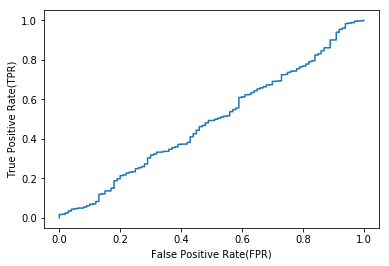

In [9]:
import matplotlib.pyplot as plt
plt.plot(FPR_array, TPR_array)
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [10]:
data1 = np.loadtxt(r'C:\Users\SVF\Desktop\Data\5_b.csv', delimiter = ',' , skiprows = 1)

print('No. of Positive Datapoints:', np.sum(data1[0:, 0] == 1.0))

print('No. of Negative Datapoints:', np.sum(data1[0:, 0] == 0.0))

No. of Positive Datapoints: 100
No. of Negative Datapoints: 10000


In [11]:
# Compute y_pred
y = data1[0:, 0]
y_pred = np.where(data1[0:, 1] > 0.5, 1, 0)

In [12]:
# Confusion Matrix:

# True Negative
TN = np.sum((y == 0.0) & (y_pred == 0))

# False Negative
FN = np.sum((y == 1.0) & (y_pred == 0))

# False Positive
FP = np.sum((y == 0.0) & (y_pred == 1))

# True Positive
TP = np.sum((y == 1.0) & (y_pred == 1))

Confusion_Matrix = np.array([[TN, FN],[FP,TP]])
print('Confusion Matrix:', Confusion_Matrix)

Confusion Matrix: [[9761   45]
 [ 239   55]]


In [13]:
# First calculate Precision
Precision = TP / (TP + FP)
print('Precision:', Precision)

# Calculate Recall
Recall = TP / (TP + FN)
print('Recall:', Recall)

# Compute F1 Score 
num = Precision * Recall
den = Precision + Recall

F1_Score = 2 * (num / den)
print('F1-Score:', F1_Score)


Precision: 0.1870748299319728
Recall: 0.55
F1-Score: 0.2791878172588833


In [14]:
# Compute Accuracy Score
Accuracy = (TP + TN) / len(data1)
print('Accuracy_Score:', Accuracy)

Accuracy_Score: 0.9718811881188119


In [15]:
# Compute AUC Score 
Data1 = data1[data1[0:, 1].argsort()][::-1]
y = Data1[0:, 0]
probability_score = Data1[0:, 1]

TPR_Values = []
FPR_Values = []

for threshold in probability_score:
    threshold_y_pred = np.where(probability_score > threshold, 1, 0)
    TN = np.sum((y == 0.0) & (threshold_y_pred == 0))  # True Negative
    FN = np.sum((y == 1.0) & (threshold_y_pred == 0))  # False Negative 
    FP = np.sum((y == 0.0) & (threshold_y_pred == 1))  # False Positive
    TP = np.sum((y == 1.0) & (threshold_y_pred == 1))  # True Positive
    
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    
    TPR_Values.append(TPR)
    FPR_Values.append(FPR)
    
TPR_array = np.array(TPR_Values)
FPR_array = np.array(FPR_Values)

AUC_Score = np.trapz(TPR_array, FPR_array)
print('AUC Score:', AUC_Score)

AUC Score: 0.9376570000000001


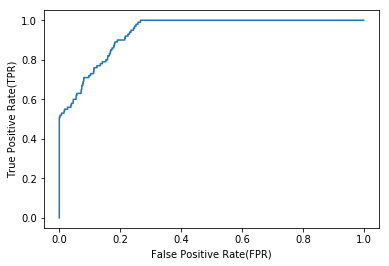

In [16]:
import matplotlib.pyplot as plt
plt.plot(FPR_array, TPR_array)
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [17]:
data2 = np.loadtxt(r'C:\Users\SVF\Desktop\Data\5_c.csv', delimiter = ',', skiprows = 1)

Data2 = data2[data2[0:, 1].argsort()][::-1]
y = Data2[0:, 0]
probability_score = Data2[0:, 1]

A_Values = []

for threshold in probability_score:
    threshold_y_pred = np.where(probability_score > threshold, 1, 0)
    FN = np.sum((y == 1.0) & (threshold_y_pred == 0))  # False Negative 
    FP = np.sum((y == 0.0) & (threshold_y_pred == 1))  # False Positive
    
    A = 500 * FN + 100 * FP
    A_Values.append(A)
    
print('Best Threshold:', min(A_Values))
   
    

Best Threshold: 141000


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [18]:
data3 = np.loadtxt(r'C:\Users\SVF\Desktop\Data\5_d.csv', delimiter = ',', skiprows = 1)

# Compute Mean Square Error 
y = data3[0:, 0]
y_pred = data3[0:, 1]
n = len(data3)

MSE = 1/n * np.sum((y - y_pred)**2) 
print('Mean Square Error:', MSE)

Mean Square Error: 177.16569974554707


In [19]:
# Compute Mean Absolute Percentage Error(MAPE)
MAPE = np.sum(np.absolute(y - y_pred)) / np.sum(y) 
print('MAPE:', MAPE)

MAPE: 0.1291202994009687


In [20]:
# Compute R^2 or Coefficient of Determination error

sum_of_sqares_of_residue = np.sum((y - y_pred)**2)
total_sum_of_squares = np.sum((y - np.mean(y))**2)

COD = 1 - (sum_of_sqares_of_residue / total_sum_of_squares)
print('Coefficient of Determination:', COD)

Coefficient of Determination: 0.9563582786990937
